In [1]:
#Analysis of "U.S. Supermarket Data" from Kaggle
#Data: https://www.kaggle.com/sindraanthony9985/marketing-data-for-a-supermarket-in-united-states
#Data consists of information from 50 branches of a supermarket in the United States
#Data contains 4 csv files
#Import libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import collections, numpy
from scipy import stats
from pylab import rcParams 
%matplotlib inline

In [2]:
#Print the directory
import os 
cwd=os.getcwd()

print (cwd)

/Users/saralanclos/Thinkful Data Science Projects/U.S. Supermarket Data


In [3]:
#Change the directory to the CSV file
os.chdir('/Users/saralanclos/Desktop/supermarketmarketing')
os.getcwd()

'/Users/saralanclos/Desktop/supermarketmarketing'

In [4]:
#Print the directory to make sure it is good
arr=os.listdir('.')
print(arr)

['Ads_CTR_Optimisation.csv', 'Market_Basket_Optimisation.csv', 'Supermarket_CustomerMembers.csv', '50_SupermarketBranches.csv']


In [5]:
#These are the file names:
#U.S. Supermarket Data
#Supermarket Branch Information (50 supermarket branches)
#50 supermarket branches: their locations(state), profits and spending on advertisement, administration and promotion
branches=pd.read_csv('50_SupermarketBranches.csv')
#Advertisement Information (Click Through Rate)
#Click-Through Rates (CTR) from 10000 users in 10 different advertisements
ads=pd.read_csv('Ads_CTR_Optimisation.csv')
#Sales
#7500 sales transactions in a week
sales=pd.read_csv('Market_Basket_Optimisation.csv', header=None)
#Customer Information
#Includes ID, Gender, Age, Annual Income and Spending Score
customers=pd.read_csv('Supermarket_CustomerMembers.csv')

In [6]:
#Preview of data "branches"
branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#Shape of data "branches"
branches.shape
#"branches" is 50 rows and 5 columns

(50, 5)

In [8]:
#Type of data "branches"
branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement Spend   50 non-null     float64
 1   Promotion Spend       50 non-null     float64
 2   Administration Spend  50 non-null     float64
 3   State                 50 non-null     object 
 4   Profit                50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
#Preview of data "ads"
ads.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [10]:
#Shape of data "ads"
ads.shape
#"ads" is 10000 rows and 10 columns

(10000, 10)

In [11]:
#Type of data "ads"
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [12]:
#Preview of data "sales"
sales.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Shape of data "sales"
sales.shape
#"sales" is 7501 rows and 20 columns

(7501, 20)

In [14]:
#Type of data "sales"
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [15]:
#Preview of data "customers"
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#Shape of data "customers"
customers.shape
#"customers" is 200 rows and 5 columns

(200, 5)

In [17]:
#Type of data "customers"
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


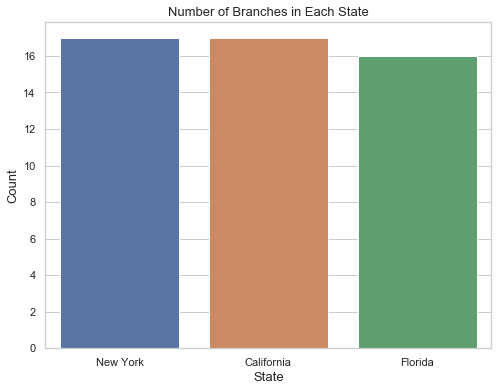

In [18]:
#Exploratory analysis
#Question: How many branches are there in each state?
#branches['State'].nunique()
#branches['State'].unique()
#Three states total: New York, California, Florida
#branches['State'].value_counts()
#17 stores in California, 17 in New York and 16 in Florida
plt.figure(figsize=(8,6))
sns.set()
sns.set(style='whitegrid')
ax=sns.countplot(branches['State'], data=branches)
ax.set_title('Number of Branches in Each State', fontsize=13)
ax.set_xlabel('State', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
plt.show()
#17 branches in New York, 17 branches in California, 16 branches in Florida

In [19]:
#Descriptive statistics for "Advertisement Spend" column
branches['Advertisement Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: Advertisement Spend, dtype: float64

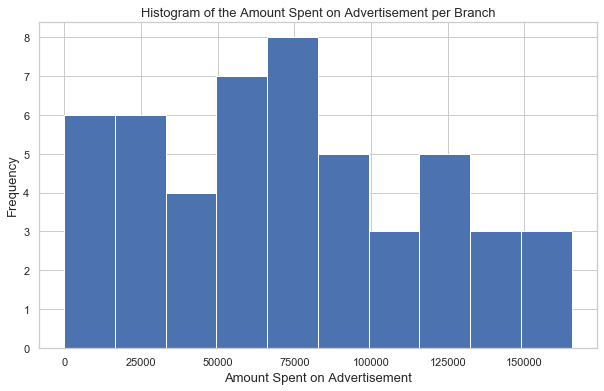

In [20]:
#Histogram of amount spent on advertisement across all branches (in 3 states)
plt.figure(figsize=(10,6))
plt.hist(branches['Advertisement Spend'])
plt.title('Histogram of the Amount Spent on Advertisement per Branch', fontsize=13)
plt.xlabel('Amount Spent on Advertisement', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [21]:
#Descriptive statistics for "Promotion Spend" column
branches['Promotion Spend'].describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Promotion Spend, dtype: float64

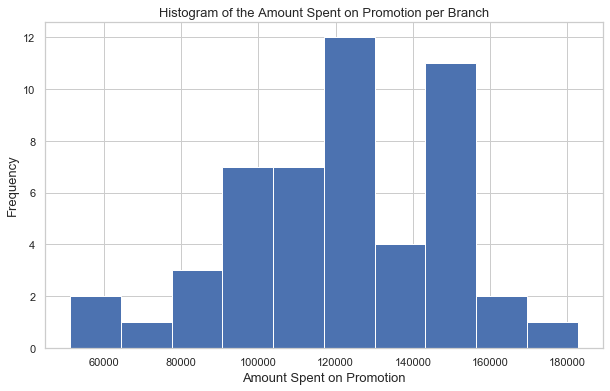

In [22]:
#Histogram of amount spent on promotion across all branches (in 3 states)
plt.figure(figsize=(10,6))
plt.hist(branches['Promotion Spend'])
plt.title('Histogram of the Amount Spent on Promotion per Branch', fontsize=13)
plt.xlabel('Amount Spent on Promotion', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [23]:
#Descriptive statistics for "Administration Spend" column
branches['Administration Spend'].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Administration Spend, dtype: float64

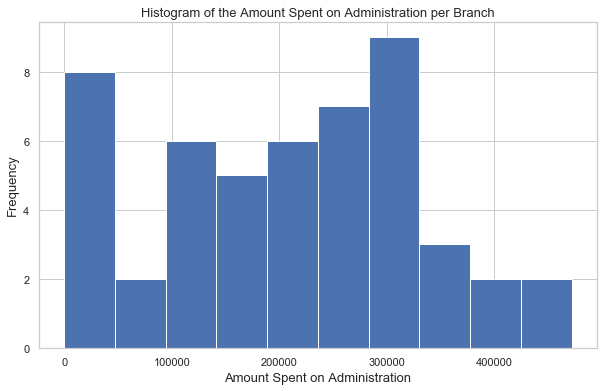

In [24]:
#Histogram of amount spent on administration across all branches (in 3 states)
plt.figure(figsize=(10,6))
plt.hist(branches['Administration Spend'])
plt.title('Histogram of the Amount Spent on Administration per Branch', fontsize=13)
plt.xlabel('Amount Spent on Administration', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [25]:
#Descriptive statistics for "Profit" column
branches['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

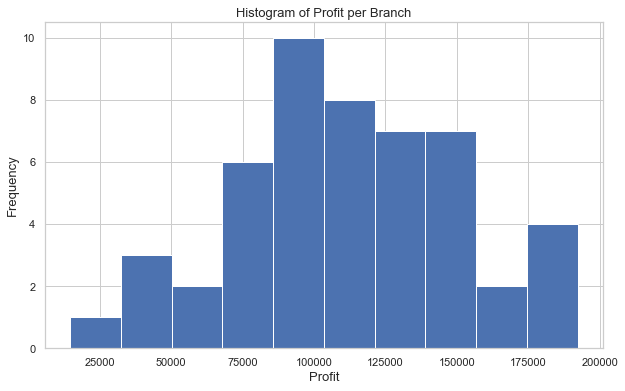

In [26]:
#Histogram of profit across all branches (in 3 states)
plt.figure(figsize=(10,6))
plt.hist(branches['Profit'])
plt.title('Histogram of Profit per Branch', fontsize=13)
plt.xlabel('Profit', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [27]:
#Branches in New York
branches_New_York=branches[branches['State']=='New York']

In [28]:
#New York
#What are the total (all branches) and average (per branch) amounts spent on advertisement, promotion and administration in New York?
#What are the total (all branches) and average (per branch) profits in New York?
New_York_advertisement_spent_total=branches_New_York['Advertisement Spend'].sum()
print('The total spent on Advertisement in New York is: {}.'.format(New_York_advertisement_spent_total))
New_York_advertisement_spent_average=branches_New_York['Advertisement Spend'].mean()
print('The average spent on Advertisement in New York is: {}.'.format(New_York_advertisement_spent_average))

New_York_promotion_spent_total=branches_New_York['Promotion Spend'].sum()
print('The total spent on Promotion in New York is: {}.'.format(New_York_promotion_spent_total))
New_York_promotion_spent_average=branches_New_York['Promotion Spend'].mean()
print('The average spent on Promotion in New York is: {}.'.format(New_York_promotion_spent_average))

New_York_administration_spent_total=branches_New_York['Administration Spend'].sum()
print('The total spent on Administration in New York is: {}.'.format(New_York_administration_spent_total))
New_York_administration_spent_average=branches_New_York['Administration Spend'].mean()
print('The average spent on Administration in New York is: {}.'.format(New_York_administration_spent_average))

New_York_profit_total=branches_New_York['Profit'].sum()
print('The total Profit in New York is: {}.'.format(New_York_profit_total))
New_York_profit_average=branches_New_York['Profit'].mean()
print('The average Profit in New York is: {}.'.format(New_York_profit_average))

The total spent on Advertisement in New York is: 1295316.06.
The average spent on Advertisement in New York is: 76195.06235294118.
The total spent on Promotion in New York is: 2066239.0.
The average spent on Promotion in New York is: 121543.4705882353.
The total spent on Administration in New York is: 3490882.2699999996.
The average spent on Administration in New York is: 205346.01588235298.
The total Profit in New York is: 1933859.5899999996.
The average Profit in New York is: 113756.44647058824.


In [29]:
#Branches in California
branches_California=branches[branches['State']=='California']

In [30]:
#California
#What are the total (all branches) and average (per branch) amounts spent on advertisement, promotion and administration in California?
#What are the total (all branches) and average (per branch) profits in California?
California_advertisement_spent_total=branches_California['Advertisement Spend'].sum()
print('The total spent on Advertisement in California is: {}.'.format(California_advertisement_spent_total))
California_advertisement_spent_average=branches_California['Advertisement Spend'].mean()
print('The average spent on Advertisement in California is: {}.'.format(California_advertisement_spent_average))

California_promotion_spent_total=branches_California['Promotion Spend'].sum()
print('The total spent on Promotion in California is: {}.'.format(California_promotion_spent_total))
California_promotion_spent_average=branches_California['Promotion Spend'].mean()
print('The average spent on Promotion in California is: {}.'.format(California_promotion_spent_average))

California_administration_spent_total=branches_California['Administration Spend'].sum()
print('The total spent on Administration in California is: {}.'.format(California_administration_spent_total))
California_administration_spent_average=branches_California['Administration Spend'].mean()
print('The average spent on Administration in California is: {}.'.format(California_administration_spent_average))

California_profit_total=branches_California['Profit'].sum()
print('The total Profit in California is: {}.'.format(California_profit_total))
California_profit_average=branches_California['Profit'].mean()
print('The average Profit in California is: {}.'.format(California_profit_average))

The total spent on Advertisement in California is: 1099180.46.
The average spent on Advertisement in California is: 64657.674117647046.
The total spent on Promotion in California is: 2052690.62.
The average spent on Promotion in California is: 120746.50705882355.
The total spent on Administration in California is: 3103195.8000000003.
The average spent on Administration in California is: 182540.9294117647.
The total Profit in California is: 1766387.98.
The average Profit in California is: 103905.17529411765.


In [31]:
#Branches in Florida
branches_Florida=branches[branches['State']=='Florida']

In [32]:
#Florida
#What are the total (all branches) and average (per branch) amounts spent on advertisement, promotion and administration in Florida?
#What are the total (all branches) and average (per branch) profits in Florida?
Florida_advertisement_spent_total=branches_Florida['Advertisement Spend'].sum()
print('The total spent on Advertisement in Florida is: {}.'.format(Florida_advertisement_spent_total))
Florida_advertisement_spent_average=branches_Florida['Advertisement Spend'].mean()
print('The average spent on Advertisement in Florida is: {}.'.format(Florida_advertisement_spent_average))

Florida_promotion_spent_total=branches_Florida['Promotion Spend'].sum()
print('The total spent on Promotion in Florida is: {}.'.format(Florida_promotion_spent_total))
Florida_promotion_spent_average=branches_Florida['Promotion Spend'].mean()
print('The average spent on Promotion in Florida is: {}.'.format(Florida_promotion_spent_average))

Florida_administration_spent_total=branches_Florida['Administration Spend'].sum()
print('The total spent on Administration in Florida is: {}.'.format(Florida_administration_spent_total))
Florida_administration_spent_average=branches_Florida['Administration Spend'].mean()
print('The average spent on Administration in Florida is: {}.'.format(Florida_administration_spent_average))

Florida_profit_total=branches_Florida['Profit'].sum()
print('The total Profit in Florida is: {}.'.format(Florida_profit_total))
Florida_profit_average=branches_Florida['Profit'].mean()
print('The average Profit in Florida is: {}.'.format(Florida_profit_average))

The total spent on Advertisement in Florida is: 1291584.26.
The average spent on Advertisement in Florida is: 80724.01624999999.
The total spent on Promotion in Florida is: 1948302.36.
The average spent on Promotion in Florida is: 121768.8975.
The total spent on Administration in Florida is: 3957176.8200000003.
The average spent on Administration in Florida is: 247323.55124999996.
The total Profit in Florida is: 1900384.39.
The average Profit in Florida is: 118774.02437500002.


In [33]:
#By State
#What are the total and average amounts spent on advertisement by state?
New_York_advertisement_spent_total=branches_New_York['Advertisement Spend'].sum()
print('The total spent on Advertisement in New York is: {}.'.format(New_York_advertisement_spent_total))
New_York_advertisement_spent_average=branches_New_York['Advertisement Spend'].mean()
print('The average spent on Advertisement in New York is: {}.'.format(New_York_advertisement_spent_average))

California_advertisement_spent_total=branches_California['Advertisement Spend'].sum()
print('The total spent on Advertisement in California is: {}.'.format(California_advertisement_spent_total))
California_advertisement_spent_average=branches_California['Advertisement Spend'].mean()
print('The average spent on Advertisement in California is: {}.'.format(California_advertisement_spent_average))

Florida_advertisement_spent_total=branches_Florida['Advertisement Spend'].sum()
print('The total spent on Advertisement in Florida is: {}.'.format(Florida_advertisement_spent_total))
Florida_advertisement_spent_average=branches_Florida['Advertisement Spend'].mean()
print('The average spent on Advertisement in Florida is: {}.'.format(Florida_advertisement_spent_average))

The total spent on Advertisement in New York is: 1295316.06.
The average spent on Advertisement in New York is: 76195.06235294118.
The total spent on Advertisement in California is: 1099180.46.
The average spent on Advertisement in California is: 64657.674117647046.
The total spent on Advertisement in Florida is: 1291584.26.
The average spent on Advertisement in Florida is: 80724.01624999999.


In [34]:
#What are the total and average amounts spent on promotion by state?
New_York_promotion_spent_total=branches_New_York['Promotion Spend'].sum()
print('The total spent on Promotion in New York is: {}.'.format(New_York_promotion_spent_total))
New_York_promotion_spent_average=branches_New_York['Promotion Spend'].mean()
print('The average spent on Promotion in New York is: {}.'.format(New_York_promotion_spent_average))

California_promotion_spent_total=branches_California['Promotion Spend'].sum()
print('The total spent on Promotion in California is: {}.'.format(California_promotion_spent_total))
California_promotion_spent_average=branches_California['Promotion Spend'].mean()
print('The average spent on Promotion in California is: {}.'.format(California_promotion_spent_average))

Florida_promotion_spent_total=branches_Florida['Promotion Spend'].sum()
print('The total spent on Promotion in Florida is: {}.'.format(Florida_promotion_spent_total))
Florida_promotion_spent_average=branches_Florida['Promotion Spend'].mean()
print('The average spent on Promotion in Florida is: {}.'.format(Florida_promotion_spent_average))

The total spent on Promotion in New York is: 2066239.0.
The average spent on Promotion in New York is: 121543.4705882353.
The total spent on Promotion in California is: 2052690.62.
The average spent on Promotion in California is: 120746.50705882355.
The total spent on Promotion in Florida is: 1948302.36.
The average spent on Promotion in Florida is: 121768.8975.


In [35]:
#What are the total and average amounts spent on administration by state?
New_York_administration_spent_total=branches_New_York['Administration Spend'].sum()
print('The total spent on Administration in New York is: {}.'.format(New_York_administration_spent_total))
New_York_administration_spent_average=branches_New_York['Administration Spend'].mean()
print('The average spent on Administration in New York is: {}.'.format(New_York_administration_spent_average))

California_administration_spent_total=branches_California['Administration Spend'].sum()
print('The total spent on Administration in California is: {}.'.format(California_administration_spent_total))
California_administration_spent_average=branches_California['Administration Spend'].mean()
print('The average spent on Administration in California is: {}.'.format(California_administration_spent_average))

Florida_administration_spent_total=branches_Florida['Administration Spend'].sum()
print('The total spent on Administration in Florida is: {}.'.format(Florida_administration_spent_total))
Florida_administration_spent_average=branches_Florida['Administration Spend'].mean()
print('The average spent on Administration in Florida is: {}.'.format(Florida_administration_spent_average))

The total spent on Administration in New York is: 3490882.2699999996.
The average spent on Administration in New York is: 205346.01588235298.
The total spent on Administration in California is: 3103195.8000000003.
The average spent on Administration in California is: 182540.9294117647.
The total spent on Administration in Florida is: 3957176.8200000003.
The average spent on Administration in Florida is: 247323.55124999996.


In [36]:
#What are the total and average profits by state?
New_York_profit_total=branches_New_York['Profit'].sum()
print('The total Profit in New York is: {}.'.format(New_York_profit_total))
New_York_profit_average=branches_New_York['Profit'].mean()
print('The average Profit in New York is: {}.'.format(New_York_profit_average))

California_profit_total=branches_California['Profit'].sum()
print('The total Profit in California is: {}.'.format(California_profit_total))
California_profit_average=branches_California['Profit'].mean()
print('The average Profit in California is: {}.'.format(California_profit_average))

Florida_profit_total=branches_Florida['Profit'].sum()
print('The total Profit in Florida is: {}.'.format(Florida_profit_total))
Florida_profit_average=branches_Florida['Profit'].mean()
print('The average Profit in Florida is: {}.'.format(Florida_profit_average))

The total Profit in New York is: 1933859.5899999996.
The average Profit in New York is: 113756.44647058824.
The total Profit in California is: 1766387.98.
The average Profit in California is: 103905.17529411765.
The total Profit in Florida is: 1900384.39.
The average Profit in Florida is: 118774.02437500002.


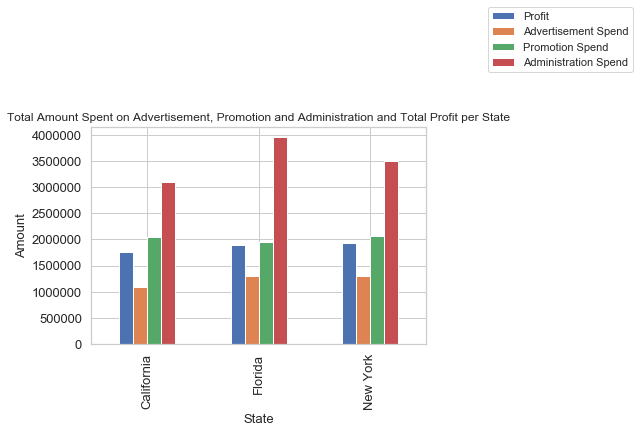

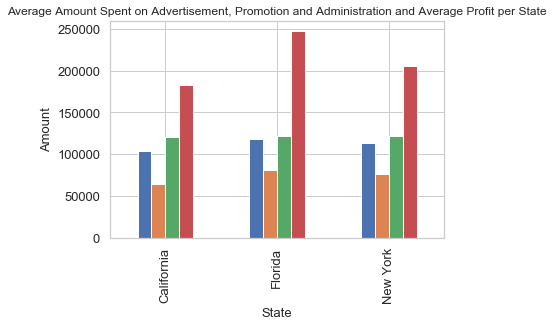

In [37]:
#Bar graphs of total and average amounts by state
#Bar graph of the total and average amounts spent on advertisement, promotion and administration by state
branches.groupby('State').sum()[['Profit', 'Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar',
title='Total Amount Spent on Advertisement, Promotion and Administration and Total Profit per State',fontsize=13, legend=True, stacked=False)
plt.legend(bbox_to_anchor=(1.4,1.4),loc='center')
plt.xlabel('State', fontsize=13)
plt.ylabel('Amount', fontsize=13)

#Bar graph of the total and average profits by state
branches.groupby('State').mean()[['Profit', 'Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar',
title='Average Amount Spent on Advertisement, Promotion and Administration and Average Profit per State', fontsize=13, legend=False, stacked=False)
plt.xlabel('State', fontsize=13)
plt.ylabel('Amount', fontsize=13)

plt.show()
#Total amounts
#Florida spent the most on administration, California spent the least
#New York spent the most on promotion, Florida spent the least
#New York spent the most on advertisement, California spent the least
#New York had the greatest profit, California the lowest

#Average amounts
#Florida spent the most on administration, California spent the least
#Florida spent the most on promotion, California spent the least
#Florida spent the most on advertisement, California spent the least
#Florida had the greatest profit, California had the lowest

In [38]:
#What are the total (all branches) and average (per branch) amounts spent on advertisement, promotion and administration across all branches?
#What is the total (all branches) and average (per branch) profit across all branches?
branches['Administration Spend'].sum()
print('The total spent on Administration is: {}.'.format(branches['Administration Spend'].sum()))
branches['Administration Spend'].mean()
print('The average spent on Administration is: {}.'.format(branches['Administration Spend'].mean()))

branches['Promotion Spend'].sum()
print('The total spent on Promotion is: {}.'.format(branches['Promotion Spend'].sum()))
branches['Promotion Spend'].mean()
print('The average spent on Promotion is: {}.'.format(branches['Promotion Spend'].mean()))

branches['Advertisement Spend'].sum()
print('The total spent on Advertisement is: {}.'.format(branches['Advertisement Spend'].sum()))
branches['Advertisement Spend'].mean()
print('The average spent on Advertisement is: {}.'.format(branches['Advertisement Spend'].mean()))

branches['Profit'].sum()
print('The total Profit is: {}.'.format(branches['Profit'].sum()))
branches['Profit'].mean()
print('The average Profit is: {}.'.format(branches['Profit'].mean()))

The total spent on Administration is: 10551254.89.
The average spent on Administration is: 211025.09780000005.
The total spent on Promotion is: 6067231.98.
The average spent on Promotion is: 121344.63959999995.
The total spent on Advertisement is: 3686080.7800000003.
The average spent on Advertisement is: 73721.61559999999.
The total Profit is: 5600631.960000001.
The average Profit is: 112012.63920000002.


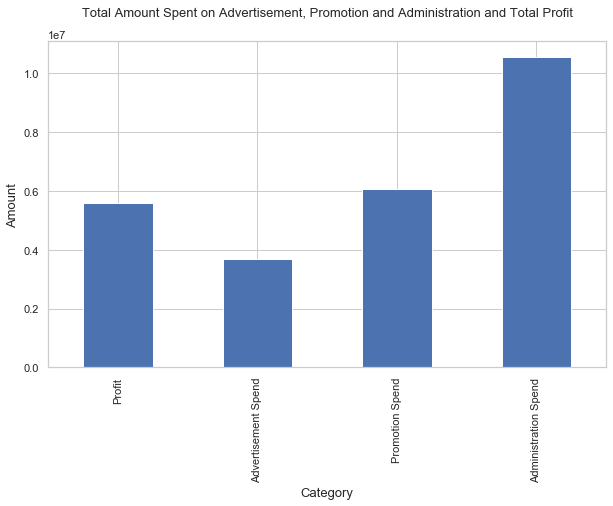

In [39]:
#What is the total profit and the total amounts spent on advertisement, promotion and administration across all branches?
#Bar graph of the total profit and the total amounts spent on advertisement, promotion and administration across all branches
plt.figure(figsize=(10,6))
branches.sum()[['Profit', 'Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar', stacked=False)
plt.title('Total Amount Spent on Advertisement, Promotion and Administration and Total Profit',y=1.06, fontsize=13)
plt.xlabel('Category', fontsize=13)
plt.ylabel('Amount', fontsize=13)
plt.show()
#Note y-axis scale
#Greatest total amount is spent on administration

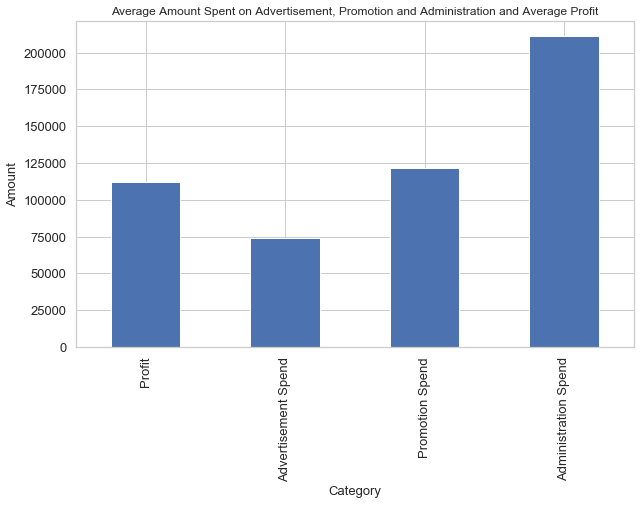

In [40]:
#What is the average profit and the average amounts spent on advertisement, promotion and administration across all branches?
#Bar graph of the average profit and the average amounts spent on advertisement, promotion and administration across all branches
plt.figure(figsize=(10,6))
branches.mean()[['Profit', 'Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar',
title='Average Amount Spent on Advertisement, Promotion and Administration and Average Profit', stacked=False, fontsize=13)
plt.xlabel('Category', fontsize=13)
plt.ylabel('Amount', fontsize=13)
plt.show()
#Greatest average amount is spent on administration

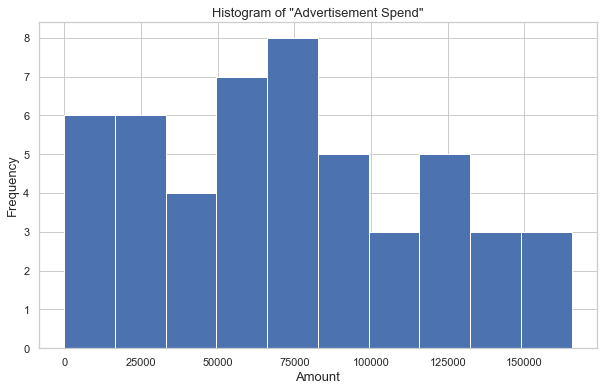

In [41]:
#Histogram of "Advertisement Spend"
plt.figure(figsize=(10,6))
plt.hist(branches['Advertisement Spend'])
plt.title('Histogram of "Advertisement Spend"', fontsize=13)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [42]:
#Is the data normally distributed?
print(stats.describe(branches['Advertisement Spend']))
#skewness=0.159
#kurtosis=-0.805
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=50, minmax=(0.0, 165349.2), mean=73721.6156, variance=2107017150.1675436, skewness=0.15904052321503395, kurtosis=-0.8050676431519039)


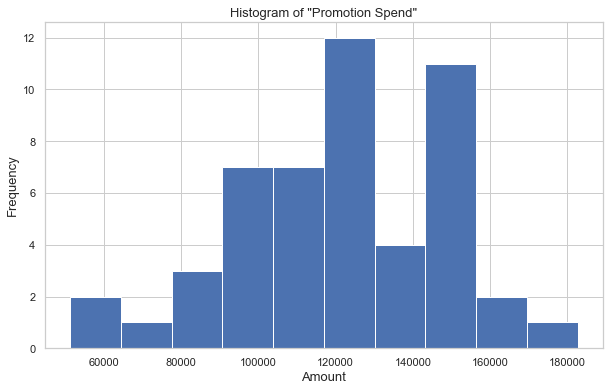

In [43]:
#Histogram of "Promotion Spend"
plt.figure(figsize=(10,6))
plt.hist(branches['Promotion Spend'])
plt.title('Histogram of "Promotion Spend"', fontsize=13)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [44]:
#Is the data normally distributed?
print(stats.describe(branches['Promotion Spend']))
#skewness=-0.474
#kurtosis=0.085
#Data is not normally distributed. It is negatively skewed and leptokurtic

DescribeResult(nobs=50, minmax=(51283.14, 182645.56), mean=121344.63960000001, variance=784997271.2454692, skewness=-0.4742300698920047, kurtosis=0.08553840791984113)


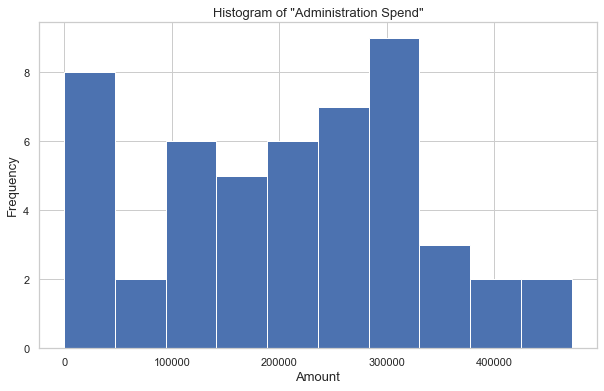

In [45]:
#Histogram of "Administration Spend"
plt.figure(figsize=(10,6))
plt.hist(branches['Administration Spend'])
plt.title('Histogram of "Administration Spend"', fontsize=13)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [46]:
#Is the data normally distributed?
print(stats.describe(branches['Administration Spend']))
#skewness=-0.045
#kurtosis=-0.724
#Data is not normally distributed. It is negatively skewed and platykurtic

DescribeResult(nobs=50, minmax=(0.0, 471784.1), mean=211025.09780000002, variance=14954920097.423788, skewness=-0.04506631617666136, kurtosis=-0.7240327111087308)


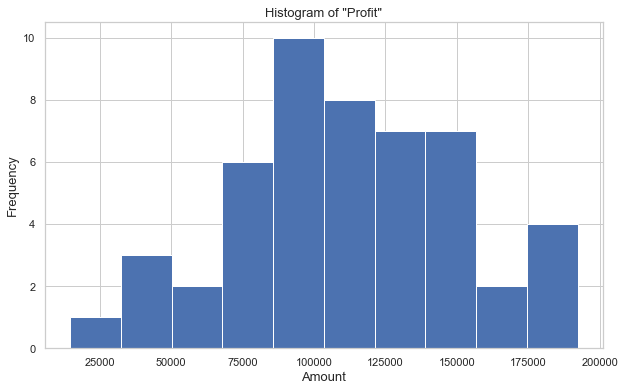

In [47]:
#Histogram of "Profit"
plt.figure(figsize=(10,6))
plt.hist(branches['Profit'])
plt.title('Histogram of "Profit"', fontsize=13)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [48]:
#Is the data normally distributed?
print(stats.describe(branches['Profit']))
#skewness=0.022
#kurtosis=-0.175
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=50, minmax=(14681.4, 192261.83), mean=112012.63920000002, variance=1624588173.4112074, skewness=0.02258638356958943, kurtosis=-0.17529637679752152)


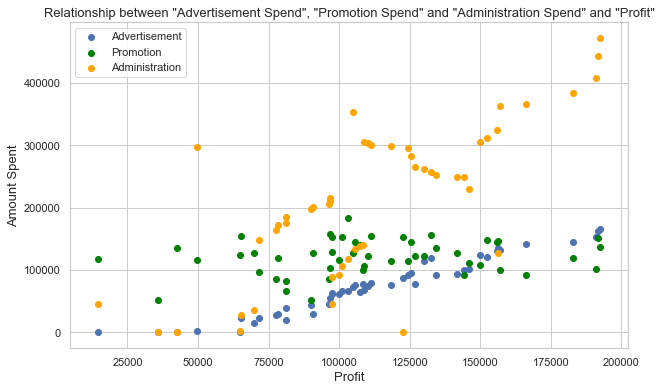

In [49]:
#1. Is there a relationship between profit and amount spent on advertisement, promotion and administration among the branches?
#Hypothesis: There are relationships between profit and amount spent on advertisement, promotion and administration.
#Scatter plot of "Advertisement Spend", "Promotion Spend", "Administration Spend" and "Profit"
plt.figure(figsize=(10,6))
plt.scatter(branches['Profit'].values, branches['Advertisement Spend'].values, color='b', label='Advertisement')
plt.scatter(branches['Profit'].values, branches['Promotion Spend'].values, color='green', label='Promotion')
plt.scatter(branches['Profit'].values, branches['Administration Spend'].values, color='orange', label='Administration')
plt.legend()
plt.title('Relationship between "Advertisement Spend", "Promotion Spend" and "Administration Spend" and "Profit"', fontsize=13)
plt.xlabel('Profit', fontsize=13)
plt.ylabel('Amount Spent', fontsize=13)
plt.show()
#Positive relationship between "Advertisement Spend" and "Profit"
#Positive relationship between "Administration Spend" and "Profit"
#Positive correlation between "Advertisement Spend" and "Profit"
#Positive correlation between "Administration Spend" and "Profit"

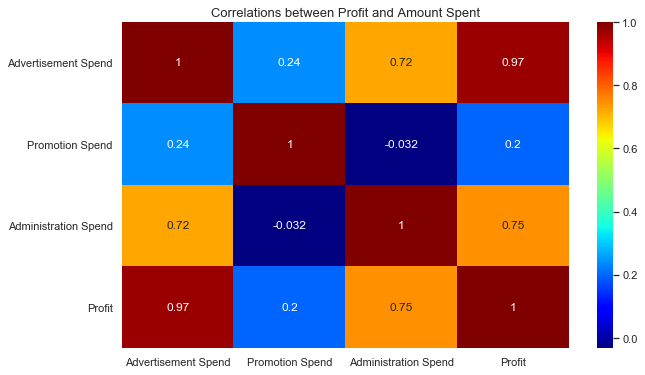

In [50]:
#Is there a correlation between "Advertisement Spend", "Promotion Spend" and "Administration Spend" with "Profit"?
#Correlations between "Advertisement Spend", "Promotion Spend", and "Administration Spend" with "Profit"
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(branches[['Advertisement Spend', 'Promotion Spend', 'Administration Spend', 'Profit']].corr(), annot=True, cmap='jet')
plt.title('Correlations between Profit and Amount Spent', fontsize=13)
plt.show()
#Correlation of 0.97 between Advertisement Spend and Profit 
#Correlation of 0.75 between Administration Spend and Profit
#Correlation of 0.2 between Promotion Spend and Profit
#All positive correlations, Advertisement Spend, Administration Spend and Promotion Spend move in the same direction as Profit
#High positive correlation between Advertisement Spend and Profit (0.97)
#Good positive correlation between Administration Spend and Profit (0.75)
#Important to spend money on Advertisement and Administration!

In [51]:
#Correlation between "Advertisement Spend" and "Profit"
#Pearson's Correlation Coefficient
stats.pearsonr(branches['Advertisement Spend'], branches['Profit'])
#High positive correlation
#Pearson's R: 0.97
#p-value less than 0.001
#p-value: 3.50*10^-32
#Unlikely to find the result if the correlation coefficient is 0

(0.9729004656594832, 3.50032224369026e-32)

In [52]:
#Correlation between "Administration Spend" and "Profit"
#Pearson's Correlation Coefficient
stats.pearsonr(branches['Administration Spend'], branches['Profit'])
#Mid-high positive correlation
#Pearson's R: 0.74
#p-value less than 0.001
#p-value: 4.38*10^-10
#Unlikely to find the result if the correlation coefficient is 0

(0.7477657217414766, 4.381073182030977e-10)

In [53]:
#Correlation between "Promotion Spend" and "Profit"
#Pearson's Correlation Coefficient
stats.pearsonr(branches['Promotion Spend'], branches['Profit'])
#Low positive correlation
#Pearson's R: 0.20
#p-value not significant
#p-value: 0.16
#Can not say it is unlikely to find the result if the correlation coefficient is 0

(0.20071656826872136, 0.16221739470358268)

In [54]:
#Summary table of correlations between "Advertisement Spend", "Promotion Spend", and "Administration Spend" with "Profit"
branches.corr()

,Advertisement Spend,Promotion Spend,Administration Spend,Profit
Advertisement Spend,1.000000,0.241955,0.724248,0.972900
Promotion Spend,0.241955,1.000000,-0.032154,0.200717
Administration Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


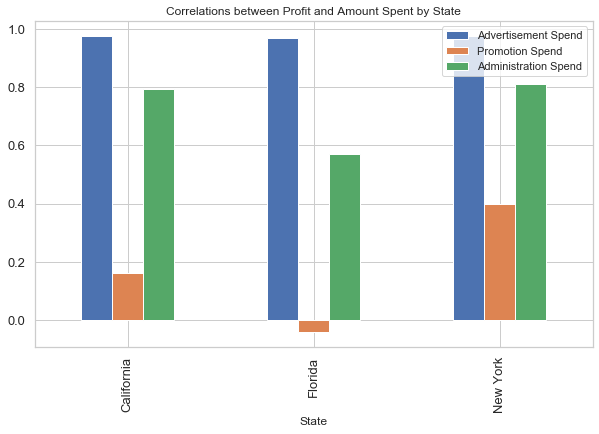

In [55]:
#What are the by state correlations between "Advertisement Spend", "Promotion Spend", and "Administration Spend" with "Profit"?
#By state correlations between "Advertisement Spend", "Promotion Spend", and "Administration Spend" with "Profit"
branches.groupby('State').corr()[['Profit']].unstack(level=1)['Profit'][['Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar',
                                                title='Correlations between Profit and Amount Spent by State', fontsize=13, figsize=(10,6), legend=True)
plt.legend(loc='upper right')
plt.show()
#Strong positive correlation in the three states between profit and amount spent on advertisement
#Strong positive correlation in California and New York between profit and amount spent on administration
#Moderate positive correlation in Florida between profit and amount spent on administration
#Weak positive correlation in New York between profit and amount spent on promotion
#Very weak correlation in California (positive) and Florida (negative) between profit and amount spent on promotion

#In California, Florida and New York it is a good idea to spend on advertisement
#In California and New York it is a good idea to spend on administration
#In Florida, it is okay to spend on administration
#In New York, it is okay, but not advisable, to spend on promotion
#In California and Florida it is not advisable to spend on promotion

In [56]:
#How many times is each ad clicked on?
#There are 10 ads total and data from 10000 users for each ad
#Each out of 10000
ads.sum(axis=0)

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [57]:
#What is the percentage that each ad is clicked on?
ads.mean().sort_values()*100
#Ads 6(1.26%) and 10(4.89%) have the least number of clicks
#Ads 5(26.95%) and 8(20.91%) have the greatest number of clicks

Ad 6      1.26
Ad 10     4.89
Ad 3      7.28
Ad 9      9.52
Ad 7     11.12
Ad 4     11.96
Ad 2     12.95
Ad 1     17.03
Ad 8     20.91
Ad 5     26.95
dtype: float64

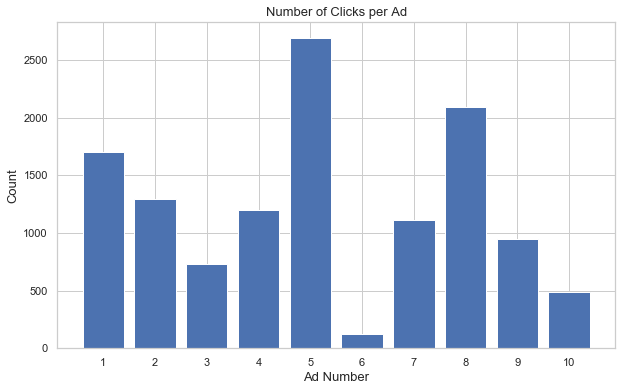

In [58]:
#How many times is an ad clicked on by users?
#Bar graph of Click-Through Rates (CTR) from 10000 users in 10 different advertisements
plt.figure(figsize=(10,6))
plt.bar(range(1,11),ads.sum(axis=0))
plt.xticks(range(1,11))
plt.xlabel('Ad Number', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Number of Clicks per Ad', fontsize=13)
plt.show()
#Click-Through Rate of Ads 5 and 8 are the highest. 
#Important to look at the ad characteristics of Ads 5 and 8 and continue to implement these methods/strategies for future ads
#Important to note that the Click-Through Rate is low for all ads. Highest Click-Through Rate is 26.95% (Ad 5)

In [59]:
#How many clicks do users make on ads?
ads.sum(axis=1).value_counts()
#Users make between 0 and 6 clicks (inclusive)

1    3822
0    2576
2    2505
3     876
4     179
5      41
6       1
dtype: int64

In [60]:
#How many clicks do users make on ads?
print('2576 users make 0 clicks.')
print('3822 users make 1 click.')
print('2505 users make 2 clicks.')
print('876 users make 3 clicks.')
print('179 users make 4 clicks.')
print('41 users make 5 clicks.')
print('1 user makes 6 clicks.')

2576 users make 0 clicks.
3822 users make 1 click.
2505 users make 2 clicks.
876 users make 3 clicks.
179 users make 4 clicks.
41 users make 5 clicks.
1 user makes 6 clicks.


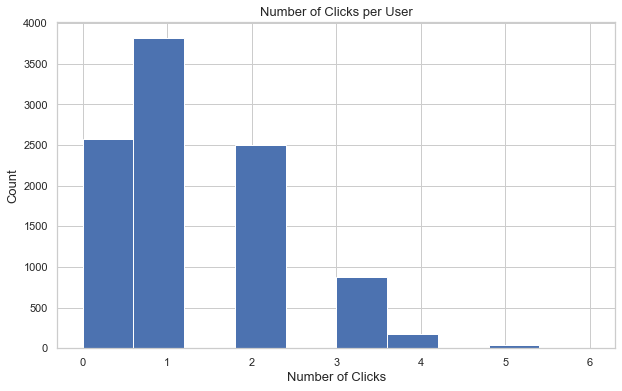

In [61]:
#Histogram of the number of clicks per user
#10000 users for 10 different advertisements
plt.figure(figsize=(10,6))
plt.hist(ads.sum(axis=1))
plt.xlabel('Number of Clicks', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Number of Clicks per User', fontsize=13)
plt.show()
#Users most frequently only click one ad
#Important for the supermarket to optimize one ad

In [62]:
#Customer information
customers['Genre'].value_counts()
#112 customers are Female
#88 customers are Male

Female    112
Male       88
Name: Genre, dtype: int64

In [63]:
#How many customers are there in total?
customers['Genre'].count()
#200 customers in total
#It is important to note the small sample size of the dataset

200

In [64]:
#Gender percentages among customers
(customers['Genre'].value_counts())/(customers['Genre'].count())*100

Female    56.0
Male      44.0
Name: Genre, dtype: float64

In [65]:
#Customer gender percentages
print('56% of customers are Female.')
print('44% of customers are Male.')

56% of customers are Female.
44% of customers are Male.


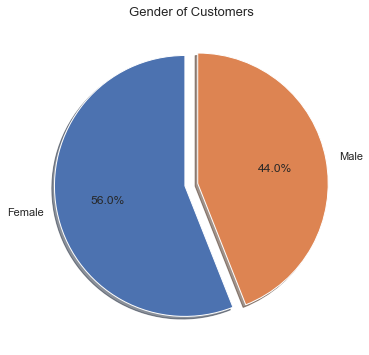

In [66]:
#Pie chart of the gender of customers
plt.figure(figsize=(10,6))
labels='Female', 'Male'
sizes=customers['Genre'].value_counts()
explode=(0.05,0.05)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.title('Gender of Customers', fontsize=13)
plt.show()
#56% of customers are Female
#44% of customers are Male

In [67]:
#What are the ages of customers?
#How many unique values for "Age" are there?
customers['Age'].nunique()
#51 unique values for "Age"

51

In [68]:
#What are the unique values for "Age"?
customers['Age'].unique()
#All the unique values for "Age"

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [69]:
#Value counts for "Age"
customers['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

In [70]:
#Index of "Age" value counts
customers['Age'].value_counts().index

Int64Index([32, 35, 19, 31, 30, 49, 27, 47, 40, 23, 36, 38, 50, 48, 29, 21, 20,
            34, 18, 28, 59, 24, 67, 54, 39, 25, 33, 22, 37, 43, 68, 45, 46, 60,
            41, 57, 66, 65, 63, 58, 26, 70, 42, 53, 52, 51, 44, 55, 64, 69,
            56],
           dtype='int64')

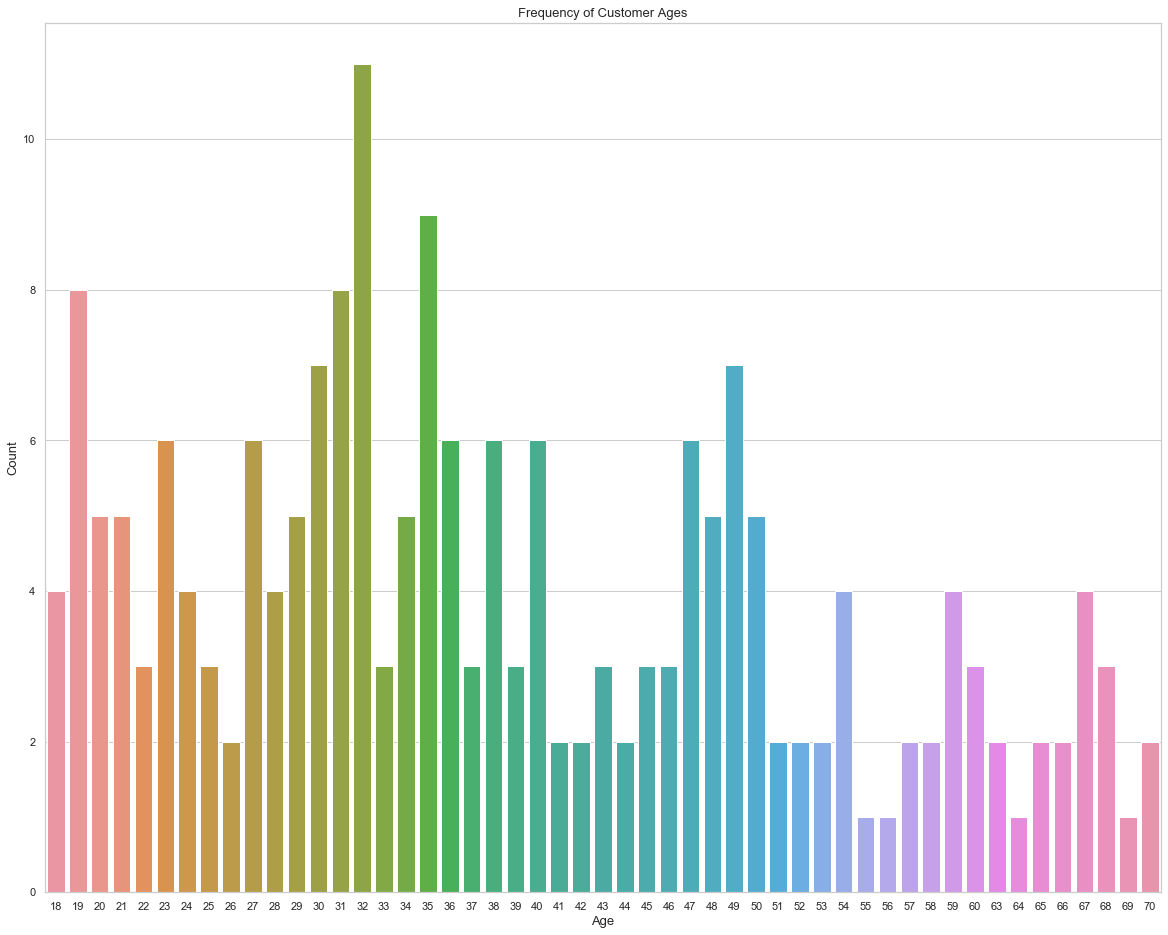

In [71]:
#How many customers are there for each age?
#Barplot of the frequency of each "Age" among customers
plt.rcParams['figure.figsize']=(20,16)
sns.barplot(x=(customers['Age'].value_counts().index), y=(customers['Age'].value_counts()))
plt.xlabel('Age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Frequency of Customer Ages', fontsize=13)
plt.show()
#32 year olds shop here the most frequently
#55, 64, 69, 56 year olds shop here the least frequently
#Important to note a small sample size, data from only 200 customers

In [72]:
#How many customers are there for each age group(18-30, 31-40, 41-50, 51-60, 61-70)?
customers_18_30=customers[(customers['Age']>=18)&(customers['Age']<=30)]
customers_31_40=customers[(customers['Age']>=31)&(customers['Age']<=40)]
customers_41_50=customers[(customers['Age']>=41)&(customers['Age']<=50)]
customers_51_60=customers[(customers['Age']>=51)&(customers['Age']<=60)]
customers_61_70=customers[(customers['Age']>=61)&(customers['Age']<=70)]

In [73]:
#How many customers are there in each age group?
customers_18_30['Age'].count()
print('There are {} customers with ages from 18-30.'.format(customers_18_30['Age'].count()))

customers_31_40['Age'].count()
print('There are {} customers with ages from 31-40.'.format(customers_31_40['Age'].count()))

customers_41_50['Age'].count()
print('There are {} customers with ages from 41-50.'.format(customers_41_50['Age'].count()))

customers_51_60['Age'].count()
print('There are {} customers with ages from 51-60.'.format(customers_51_60['Age'].count()))

customers_61_70['Age'].count()
print('There are {} customers with ages from 61-70.'.format(customers_61_70['Age'].count()))
#Out of the sample of 200 customers, the most common age ranges are from 18-30(62 customers) and 31-40(60 customers)

There are 62 customers with ages from 18-30.
There are 60 customers with ages from 31-40.
There are 38 customers with ages from 41-50.
There are 23 customers with ages from 51-60.
There are 17 customers with ages from 61-70.


In [74]:
#What percentage of customers are from 18-40 years of age (inclusive)?
(((customers_18_30['Age'].count())+(customers_31_40['Age'].count()))/(customers['Age'].count())*100)
print('{}% of the sample is between 18 and 40 years old (inclusive).'.format((((customers_18_30['Age'].count())+(customers_31_40['Age'].count()))/(customers['Age'].count())*100)))

61.0% of the sample is between 18 and 40 years old (inclusive).


In [75]:
#What is the average income for each age?
#Average income grouped by age
average_income_by_age=customers.groupby('Age')['Annual Income (k$)'].mean()

In [76]:
#Index of the value counts of average income for each age
customers.groupby('Age')['Annual Income (k$)'].mean().index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69,
            70],
           dtype='int64', name='Age')

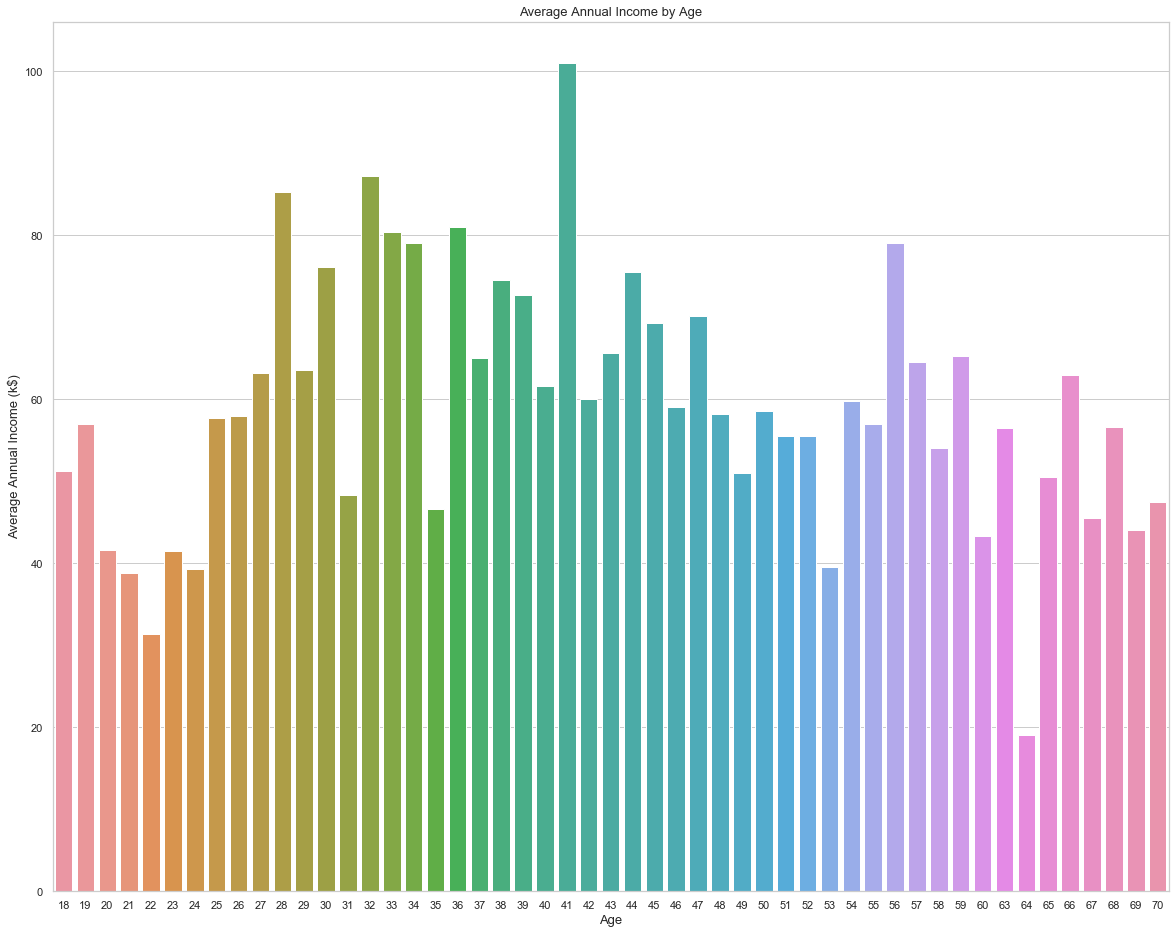

In [77]:
#What is the average annual income for each age?
#Bar graph of the average annual income by age of customers
plt.rcParams['figure.figsize']=(20,16)
values=customers.groupby('Age')['Annual Income (k$)'].mean()
labels=customers.groupby('Age')['Annual Income (k$)'].mean().index
sns.barplot(x=labels, y=values)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average Annual Income (k$)', fontsize=13)
plt.title('Average Annual Income by Age', fontsize=13)
plt.show()
#Highest average income for 41 year olds ($101,000)
#Lowest income for 64 year olds ($19,000)

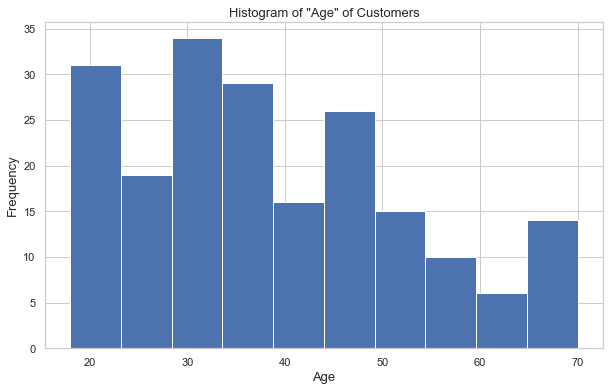

In [78]:
#Is there a relationship between age and annual income of customers?
#Histogram of the age of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Age'])
plt.title('Histogram of "Age" of Customers', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [79]:
#Is the data normally distributed?
print(stats.describe(customers['Age']))
#skewness=0.481
#kurtosis=-0.684
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=200, minmax=(18, 70), mean=38.85, variance=195.13316582914572, skewness=0.48191947090957177, kurtosis=-0.6847513947723236)


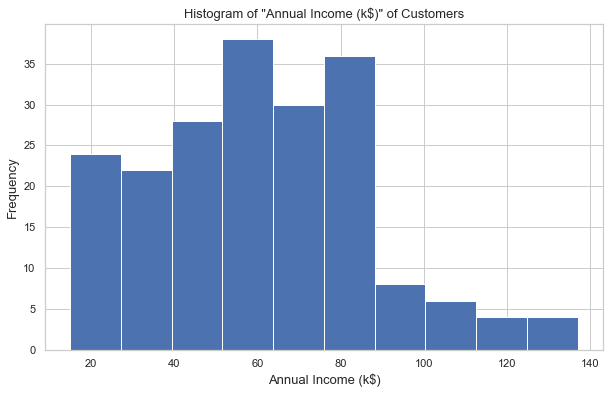

In [80]:
#Histogram of the annual income of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Annual Income (k$)'])
plt.title('Histogram of "Annual Income (k$)" of Customers', fontsize=13)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [81]:
#Is the data normally distributed?
print(stats.describe(customers['Annual Income (k$)']))
#skewness=0.319
#kurtosis=-0.125
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=200, minmax=(15, 137), mean=60.56, variance=689.8355778894472, skewness=0.319423684276314, kurtosis=-0.1258928297475106)


In [82]:
#Is there a correlation between "Age" and "Annual Income (k$)" of customers?
#Pearson's r 
scipy.stats.pearsonr(customers['Age'], customers['Annual Income (k$)'])
#Pearson's r: -0.012
#Very, very weak correlation between age and annual income.
#p-value: 0.861 is not significant
#No correlation between age and annual income of customers

(-0.012398042736060148, 0.8616748930180701)

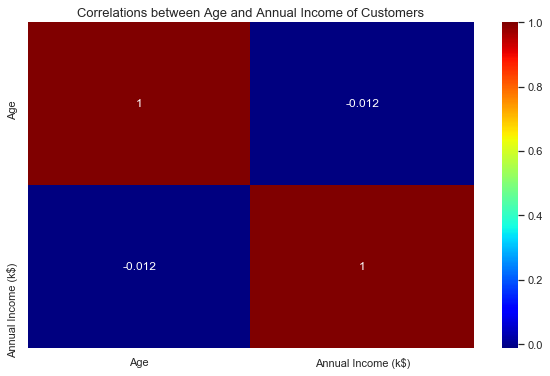

In [83]:
#Is there a correlation between "Age" and "Annual Income (k$)" of customers?
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(customers[['Age', 'Annual Income (k$)']].corr(), annot=True, cmap='jet')
plt.title('Correlations between Age and Annual Income of Customers', fontsize=13)
plt.show()
#No correlation between age and annual income of customers

In [84]:
#What is the average spending score for each age?
#average spending score grouped by age
average_spending_score_by_age=customers.groupby('Age')['Spending Score (1-100)'].mean()

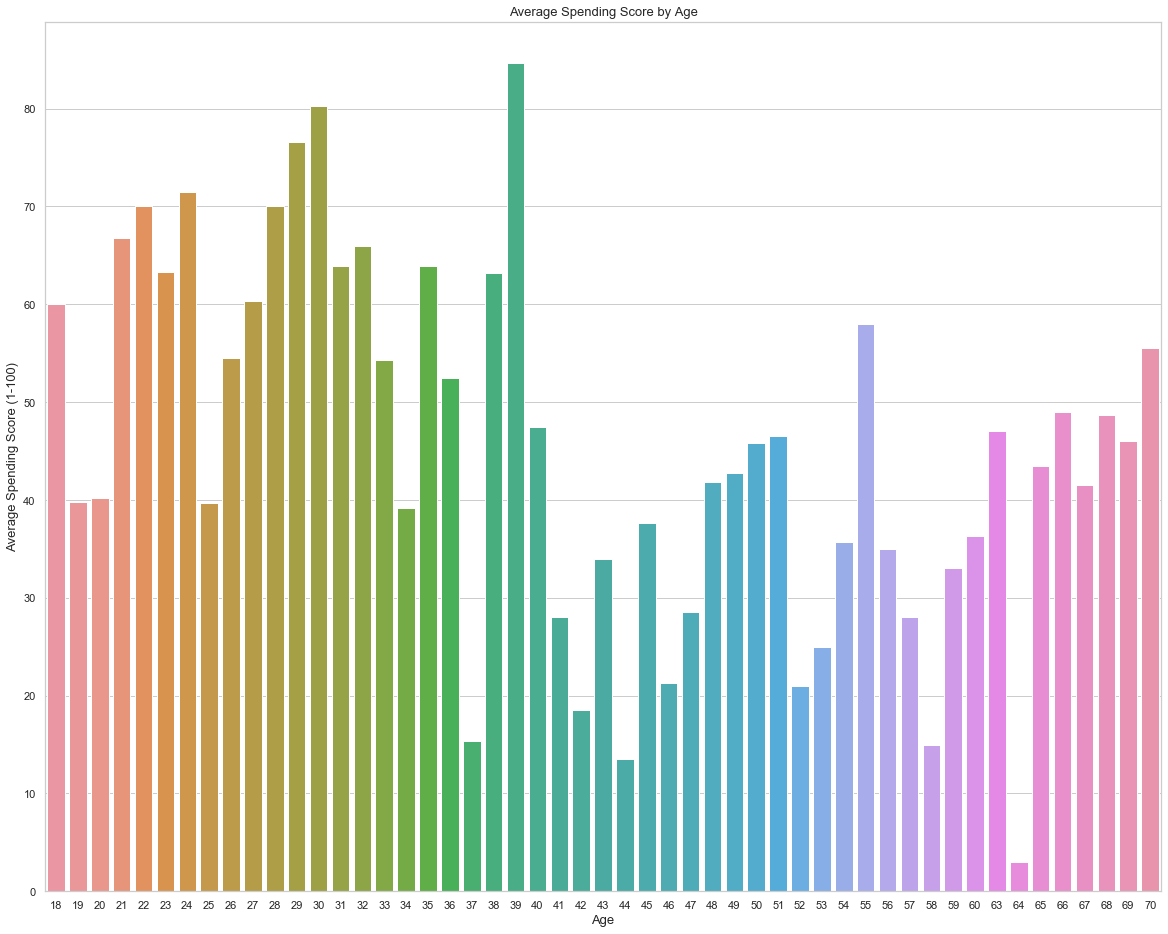

In [85]:
#What is the average spending score for each age?
#Bar graph of the average spending score by age of customers
plt.rcParams['figure.figsize']=(20,16)
values=customers.groupby('Age')['Spending Score (1-100)'].mean()
labels=customers.groupby('Age')['Spending Score (1-100)'].mean().index
sns.barplot(x=labels, y=values)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average Spending Score (1-100)', fontsize=13)
plt.title('Average Spending Score by Age', fontsize=13)
plt.show()
#39 year olds have the greatest average spending score (84.66)
#64 year olds have the lowest average spending score (3.00)

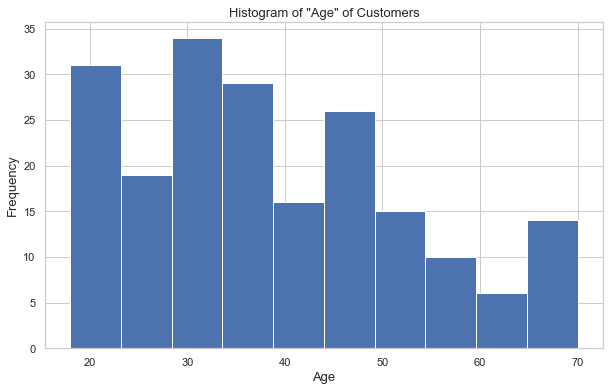

In [86]:
#2. Is there a relationship between age and spending score of customers?
#Hypothesis: There is a relationship between age and spending score of customers.
#H0: There is not a relationship between age and spending score of customers.
#Histogram of the age of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Age'])
plt.title('Histogram of "Age" of Customers', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [87]:
#Is the data normally distributed?
print(stats.describe(customers['Age']))
#skewness=0.481
#kurtosis=-0.684
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=200, minmax=(18, 70), mean=38.85, variance=195.13316582914572, skewness=0.48191947090957177, kurtosis=-0.6847513947723236)


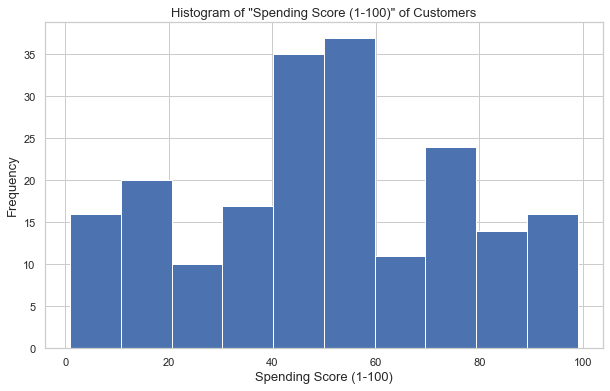

In [88]:
#Histogram of the spending score of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Spending Score (1-100)'])
plt.title('Histogram of "Spending Score (1-100)" of Customers', fontsize=13)
plt.xlabel('Spending Score (1-100)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [89]:
#Is the data normally distributed?
print(stats.describe(customers['Spending Score (1-100)']))
#skewness=-0.046
#kurtosis=-0.835
#Data is not normally distributed. It is negatively skewed and platykurtic

DescribeResult(nobs=200, minmax=(1, 99), mean=50.2, variance=666.8542713567839, skewness=-0.04686530945553505, kurtosis=-0.8359582718737237)


In [90]:
#Is there a correlation between "Age" and "Spending Score (1-100)" of customers?
#Pearson's Correlation Coefficient
scipy.stats.pearsonr(customers['Age'], customers['Spending Score (1-100)'])
#Pearson's r: -0.327
#Low negative correlation between age and spending score of customers
#p-value: 2.25*10^-6
#p-value less than 0.001
#Unlikely to find the result if the correlation coefficient is 0

(-0.32722684603909, 2.2502957035653357e-06)

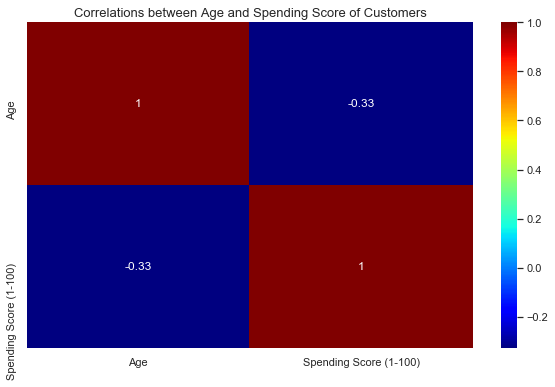

In [91]:
#Is there a correlation between age and spending score of customers?
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(customers[['Age', 'Spending Score (1-100)']].corr(), annot=True, cmap='jet')
plt.title('Correlations between Age and Spending Score of Customers', fontsize=13)
plt.show()
#Low negative correlation between age and spending score of customers

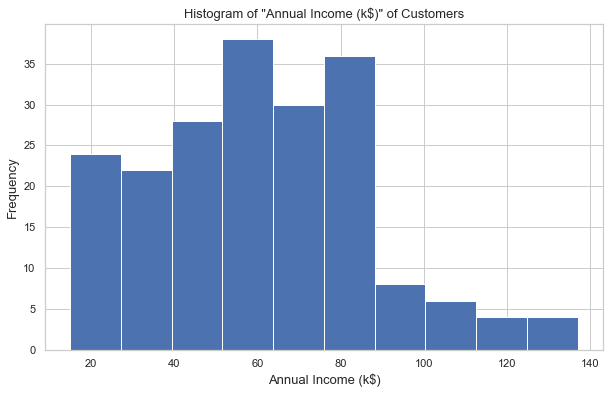

In [92]:
#Is there a relationship between annual income and spending score of customers?
#Histogram of the annual income of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Annual Income (k$)'])
plt.title('Histogram of "Annual Income (k$)" of Customers', fontsize=13)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [93]:
#Is the data normally distributed?
print(stats.describe(customers['Annual Income (k$)']))
#skewness=0.319
#kurtosis=-0.125
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=200, minmax=(15, 137), mean=60.56, variance=689.8355778894472, skewness=0.319423684276314, kurtosis=-0.1258928297475106)


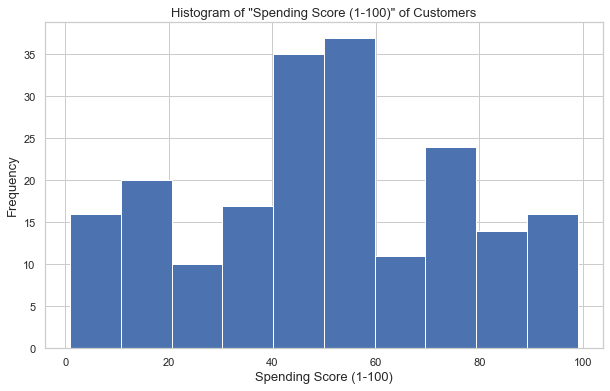

In [94]:
#Histogram of the spending score of customers
plt.figure(figsize=(10,6))
plt.hist(customers['Spending Score (1-100)'])
plt.title('Histogram of "Spending Score (1-100)" of Customers', fontsize=13)
plt.xlabel('Spending Score (1-100)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [95]:
#Is the data normally distributed?
print(stats.describe(customers['Spending Score (1-100)']))
#skewness=-0.046
#kurtosis=-0.835
#Data is not normally distributed. It is negatively skewed and platykurtic

DescribeResult(nobs=200, minmax=(1, 99), mean=50.2, variance=666.8542713567839, skewness=-0.04686530945553505, kurtosis=-0.8359582718737237)


In [96]:
#Is there a correlation between "Annual Income (k$)" and "Spending Score (1-100)" of customers?
#Pearson's Correlation Coefficient
scipy.stats.pearsonr(customers['Annual Income (k$)'], customers['Spending Score (1-100)'])
#Pearson's r: 0.009
#Very, very low positive correlation between annual income and spending score of customers.
#p-value: 0.889
#p-value not significant
#Can not say it is unlikely to find the result if the correlation coefficient is 0

(0.009902848094037603, 0.8893134370274359)

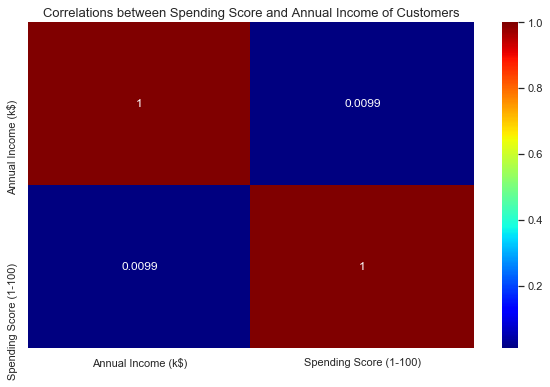

In [97]:
#Is there a correlation between annual income and spending score of customers?
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(customers[['Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='jet')
plt.title('Correlations between Spending Score and Annual Income of Customers', fontsize=13)
plt.show()
#Very, very low positive correlation between spending score and annual income of customers
#No correlation between spending score and annual income of customers

In [98]:
#3. Does gender have an effect on annual income and the spending score of customers?
#Does gender have an effect on annual income of customers?
#Hypothesis: Gender does have an effect on annual income of customers.
#H0: Gender does not have an effect on annual income of customers.
#Hypothesis: Gender does have an effect on the spending score of customers.
#H0: Gender does not have an effect on the spending score of customers.
#Separate customers by Gender
customers_male=customers[customers['Genre']=='Male']
customers_female=customers[customers['Genre']=='Female']

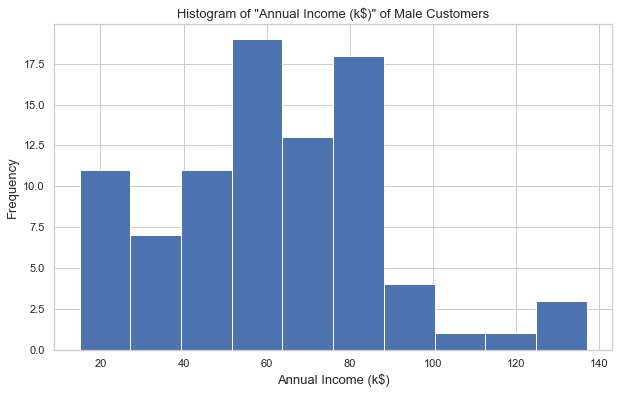

In [99]:
#Does gender have an effect on annual income of customers?
#Hypothesis: Gender does have an effect on annual income of customers.
#H0: Gender does not have an effect on annual income of customers.
#Histogram of annual income for males
plt.figure(figsize=(10,6))
plt.hist(customers_male['Annual Income (k$)'])
plt.title('Histogram of "Annual Income (k$)" of Male Customers', fontsize=13)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [100]:
#Is the data normally distributed?
print(stats.describe(customers_male['Annual Income (k$)']))
#skewness=0.340
#kurtosis=0.206
#Data is not normally distributed. It is positively skewed and leptokurtic

DescribeResult(nobs=88, minmax=(15, 137), mean=62.22727272727273, variance=709.6029258098224, skewness=0.3408352199552455, kurtosis=0.20638275696032204)


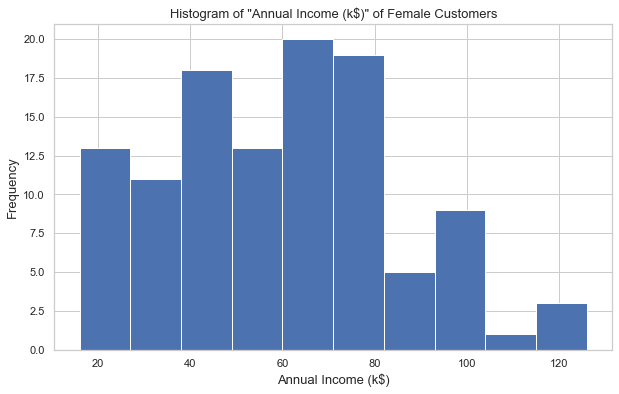

In [101]:
#Histogram of annual income for females
plt.figure(figsize=(10,6))
plt.hist(customers_female['Annual Income (k$)'])
plt.title('Histogram of "Annual Income (k$)" of Female Customers', fontsize=13)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [102]:
#Is the data normally distributed?
print(stats.describe(customers_female['Annual Income (k$)']))
#skewness=0.297
#kurtosis=-0.429
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=112, minmax=(16, 126), mean=59.25, variance=676.6216216216217, skewness=0.2970412394642844, kurtosis=-0.42967024542579324)


In [103]:
#Kruskal-Wallis Test
#Test for non-parametric distributions to determine if there is a statistically significant difference between the two groups
stats.kruskal(customers_male['Annual Income (k$)'], customers_female['Annual Income (k$)'])
#Kruskal-Wallis H statistic: 0.668
#p-value: 0.413
#No significant difference in annual income between males and females

KruskalResult(statistic=0.6681512381650779, pvalue=0.4136969129867416)

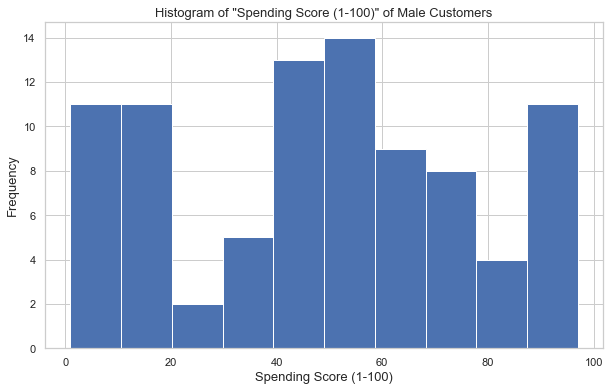

In [104]:
#Does gender have an effect on the spending score of customers?
#Hypothesis: Gender does have an effect on the spending score of customers.
#H0: Gender does not have an effect on the spending score of customers.
#Histogram of spending score for males
plt.figure(figsize=(10,6))
plt.hist(customers_male['Spending Score (1-100)'])
plt.title('Histogram of "Spending Score (1-100)" of Male Customers', fontsize=13)
plt.xlabel('Spending Score (1-100)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [105]:
#Is the data normally distributed?
print(stats.describe(customers_male['Spending Score (1-100)']))
#skewness=-0.062
#kurtosis=-0.992
#Data is not normally distributed. It is negatively skewed and platykurtic

DescribeResult(nobs=88, minmax=(1, 97), mean=48.51136363636363, variance=778.2297544409613, skewness=-0.06206864494745821, kurtosis=-0.9925880791839585)


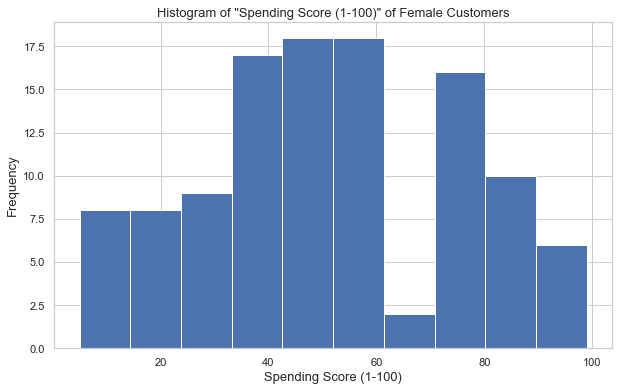

In [106]:
#Histogram of spending score for females
plt.figure(figsize=(10,6))
plt.hist(customers_female['Spending Score (1-100)'])
plt.title('Histogram of "Spending Score (1-100)" of Female Customers', fontsize=13)
plt.xlabel('Spending Score (1-100)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

In [107]:
#Is the data normally distributed?
print(stats.describe(customers_female['Spending Score (1-100)']))
#skewness=0.027
#kurtosis=-0.765
#Data is not normally distributed. It is positively skewed and platykurtic

DescribeResult(nobs=112, minmax=(5, 99), mean=51.526785714285715, variance=581.5308075933076, skewness=0.027482728247130484, kurtosis=-0.765671093519372)


In [108]:
#Kruskal-Wallis Test
#Test for non-parametric distributions to determine if there is a statistically significant difference between the two groups
stats.kruskal(customers_male['Spending Score (1-100)'], customers_female['Spending Score (1-100)'])
#Kruskal-Wallis H statistic: 0.321
#p-value: 0.570
#No significant difference in the Spending Score between Males and Females

KruskalResult(statistic=0.3219416695925177, pvalue=0.5704431025729825)

In [109]:
#Replace "NaN" in sales with "0"
sales_fillna=sales.fillna(0)

In [110]:
#How many items are sold per sales transaction?
items_per_sale=np.count_nonzero(sales_fillna, axis=1)

In [111]:
#Use Counter to determine the number of items sold in each sales transaction
items_per_sale_counter=collections.Counter(items_per_sale)

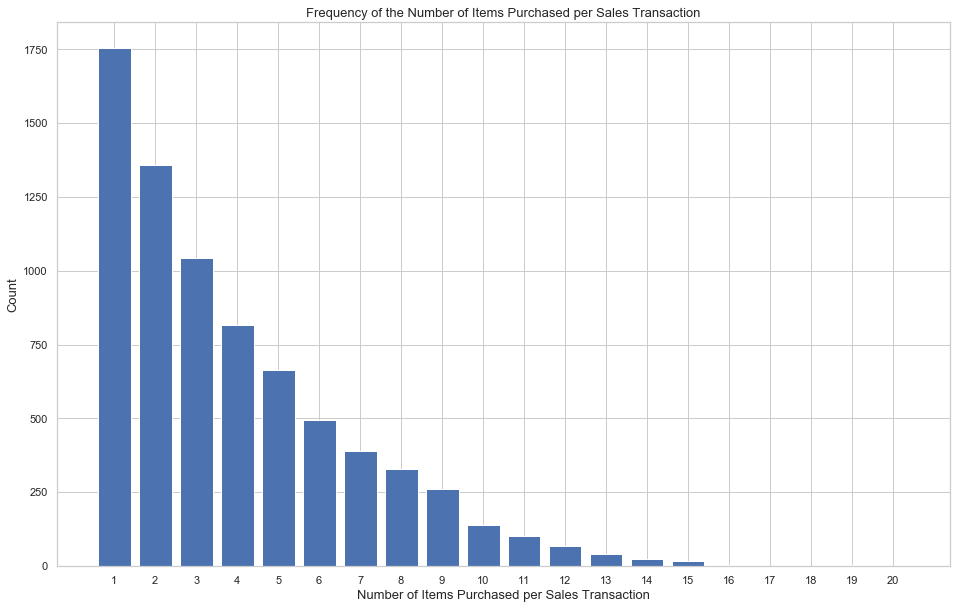

In [112]:
#Frequency of the number of items sold per sales transaction
plt.rcParams['figure.figsize']=(16,10)
plt.bar(items_per_sale_counter.keys(), items_per_sale_counter.values())
plt.xticks(range(1,21))
plt.xlabel('Number of Items Purchased per Sales Transaction', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Frequency of the Number of Items Purchased per Sales Transaction', fontsize=13)
plt.show()
#Customers most commonly purchase one item per sales transaction

In [113]:
#4. What are the 10 most and 10 least commonly purchased items by customers?
#Melt the DataFrame
sales_melt=sales.melt()

In [114]:
#Value counts of sales_melt 'value' column
sales_melt['value'].value_counts()

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: value, Length: 120, dtype: int64

In [115]:
#What are the 10 most commonly purchased items?
sales_melt['value'].value_counts().head(10)

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: value, dtype: int64

In [116]:
#The 10 most commonly purchased items
print('The 10 most commonly purchased items: mineral water, eggs, spaghetti, french fries, chocolate, green tea, milk, ground beef, frozen vegetables and pancakes.')
#Important to keep these 10 items in plentiful stock and to order them frequently

The 10 most commonly purchased items: mineral water, eggs, spaghetti, french fries, chocolate, green tea, milk, ground beef, frozen vegetables and pancakes.


In [117]:
#What are the 10 least commonly purchased items?
sales_melt['value'].value_counts().tail(10)

ketchup            33
chocolate bread    32
mashed potato      31
chutney            31
tea                29
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: value, dtype: int64

In [118]:
#The 10 least commonly purchased items
print('The 10 least commonly purchased items: ketchup, chocolate bread, mashed potato, chutney, tea, bramble, cream, napkins, water spray and asparagus.')
#Important to keep these 10 items in stock but not necessarily to order them as frequently

The 10 least commonly purchased items: ketchup, chocolate bread, mashed potato, chutney, tea, bramble, cream, napkins, water spray and asparagus.
